In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
from matplotlib import cm
import matplotlib.colors as col
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
# For scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import kneighbors_graph

In [3]:
df = pd.read_csv('/content/drive/MyDrive/PTDataScience/PandasForDataManipulation/birds.csv')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,12,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Engine Type,Engine1 Position,Engine2 Position,Engine3 Position,Engine4 Position,Airport ID,Airport,State,FAA Region,Warning Issued,Flight Phase,Visibility,Precipitation,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact,Fatalities,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,4.0,34.0,40,2.0,D,1,1.0,NaN,NaN,KCVG,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,KY,ASO,NaN,CLIMB,NaN,NaN,NaN,NaN,NaN,NE1,GULL,1,NaN,NaN,NaN,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,4.0,34.0,10,2.0,D,5,5.0,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,TAKEOFF RUN,NaN,NaN,0.0,NaN,0.0,ZZ201,HOUSE SPARROW,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,NaN,NaN,NaN,NaN,NaN,0.0,R1101,BARN OWL,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,3.0,22.0,NaN,2.0,D,NaN,NaN,NaN,NaN,KMYR,MYRTLE BEACH INTL,SC,ASO,NaN,APPROACH,DAY,NaN,200.0,138.0,NaN,UNKBM,UNKNOWN MEDIUM BIRD,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KJAX,JACKSONVILLE INTL,FL,ASO,NaN,CLIMB,DAY,NaN,100.0,200.0,NaN,ZX,FINCH,1,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,366091,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,4.0,10.0,1,2.0,D,1,1.0,NaN,NaN,UNKN,NaN,NaN,NaN,N,NaN,NaN,NONE,NaN,NaN,NaN,UNKBS,UNKNOWN SMALL BIRD,1,NONE,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
174100,365902,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,4.0,10.0,1,2.0,D,1,1.0,NaN,NaN,KDAL,DALLAS LOVE FIELD ARPT,TX,ASW,N,APPROACH,DAY,NONE,5000.0,250.0,25.0,UNKBS,UNKNOWN SMALL BIRD,1,NONE,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
174101,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,A,226,49,2.0,46.0,1,2.0,D,5,5.0,NaN,NaN,KMIA,MIAMI INTL,FL,ASO,NaN,CLIMB,DAY,NONE,3000.0,200.0,5.0,K1002,TURKEY VULTURE,1,NONE,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
174102,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10,3.0,31.0,10,2.0,C,4,4.0,NaN,NaN,KPDX,PORTLAND INTL (OR),OR,ANM,Y,DESCENT,NIGHT,NONE,6000.0,NaN,NaN,Z6014,HERMIT THRUSH,1,NONE,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [4]:
df['Species Name'] = df['Species Name'].fillna(method='ffill').fillna(method='bfill')


In [5]:
df['Species Name'].isnull().sum()

0

In [6]:
df['Visibility'] = df['Visibility'].fillna(method='ffill').fillna(method='bfill')

In [7]:
df['Visibility'].isnull().sum()

0

# New DataFrame:

In [8]:
df

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Engine Type,Engine1 Position,Engine2 Position,Engine3 Position,Engine4 Position,Airport ID,Airport,State,FAA Region,Warning Issued,Flight Phase,Visibility,Precipitation,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact,Fatalities,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,4.0,34.0,40,2.0,D,1,1.0,NaN,NaN,KCVG,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,KY,ASO,NaN,CLIMB,DAY,NaN,NaN,NaN,NaN,NE1,GULL,1,NaN,NaN,NaN,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,4.0,34.0,10,2.0,D,5,5.0,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,TAKEOFF RUN,DAY,NaN,0.0,NaN,0.0,ZZ201,HOUSE SPARROW,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,NaN,DAY,NaN,NaN,NaN,0.0,R1101,BARN OWL,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,3.0,22.0,NaN,2.0,D,NaN,NaN,NaN,NaN,KMYR,MYRTLE BEACH INTL,SC,ASO,NaN,APPROACH,DAY,NaN,200.0,138.0,NaN,UNKBM,UNKNOWN MEDIUM BIRD,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KJAX,JACKSONVILLE INTL,FL,ASO,NaN,CLIMB,DAY,NaN,100.0,200.0,NaN,ZX,FINCH,1,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,366091,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,4.0,10.0,1,2.0,D,1,1.0,NaN,NaN,UNKN,NaN,NaN,NaN,N,NaN,NIGHT,NONE,NaN,NaN,NaN,UNKBS,UNKNOWN SMALL BIRD,1,NONE,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
174100,365902,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,4.0,10.0,1,2.0,D,1,1.0,NaN,NaN,KDAL,DALLAS LOVE FIELD ARPT,TX,ASW,N,APPROACH,DAY,NONE,5000.0,250.0,25.0,UNKBS,UNKNOWN SMALL BIRD,1,NONE,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
174101,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,A,226,49,2.0,46.0,1,2.0,D,5,5.0,NaN,NaN,KMIA,MIAMI INTL,FL,ASO,NaN,CLIMB,DAY,NONE,3000.0,200.0,5.0,K1002,TURKEY VULTURE,1,NONE,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
174102,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10,3.0,31.0,10,2.0,C,4,4.0,NaN,NaN,KPDX,PORTLAND INTL (OR),OR,ANM,Y,DESCENT,NIGHT,NONE,6000.0,NaN,NaN,Z6014,HERMIT THRUSH,1,NONE,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [9]:
df['Precipitation'].value_counts()

NONE               80512
RAIN                5270
FOG                 1952
SNOW                 313
FOG, RAIN            239
RAIN, SNOW            19
FOG, SNOW             12
FOG, RAIN, SNOW        5
Name: Precipitation, dtype: int64

In [10]:
df['Precipitation']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
174099    NONE
174100    NONE
174101    NONE
174102    NONE
174103    NONE
Name: Precipitation, Length: 174104, dtype: object

In [11]:
df['Flight Impact'] = df['Flight Impact'].fillna(method='ffill').fillna(method='bfill')

In [12]:
df

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Engine Type,Engine1 Position,Engine2 Position,Engine3 Position,Engine4 Position,Airport ID,Airport,State,FAA Region,Warning Issued,Flight Phase,Visibility,Precipitation,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact,Fatalities,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,4.0,34.0,40,2.0,D,1,1.0,NaN,NaN,KCVG,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,KY,ASO,NaN,CLIMB,DAY,NaN,NaN,NaN,NaN,NE1,GULL,1,PRECAUTIONARY LANDING,NaN,NaN,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,4.0,34.0,10,2.0,D,5,5.0,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,TAKEOFF RUN,DAY,NaN,0.0,NaN,0.0,ZZ201,HOUSE SPARROW,1,PRECAUTIONARY LANDING,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,NaN,DAY,NaN,NaN,NaN,0.0,R1101,BARN OWL,1,PRECAUTIONARY LANDING,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,3.0,22.0,NaN,2.0,D,NaN,NaN,NaN,NaN,KMYR,MYRTLE BEACH INTL,SC,ASO,NaN,APPROACH,DAY,NaN,200.0,138.0,NaN,UNKBM,UNKNOWN MEDIUM BIRD,1,PRECAUTIONARY LANDING,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KJAX,JACKSONVILLE INTL,FL,ASO,NaN,CLIMB,DAY,NaN,100.0,200.0,NaN,ZX,FINCH,1,PRECAUTIONARY LANDING,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,366091,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,4.0,10.0,1,2.0,D,1,1.0,NaN,NaN,UNKN,NaN,NaN,NaN,N,NaN,NIGHT,NONE,NaN,NaN,NaN,UNKBS,UNKNOWN SMALL BIRD,1,NONE,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
174100,365902,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,4.0,10.0,1,2.0,D,1,1.0,NaN,NaN,KDAL,DALLAS LOVE FIELD ARPT,TX,ASW,N,APPROACH,DAY,NONE,5000.0,250.0,25.0,UNKBS,UNKNOWN SMALL BIRD,1,NONE,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
174101,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,A,226,49,2.0,46.0,1,2.0,D,5,5.0,NaN,NaN,KMIA,MIAMI INTL,FL,ASO,NaN,CLIMB,DAY,NONE,3000.0,200.0,5.0,K1002,TURKEY VULTURE,1,NONE,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
174102,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10,3.0,31.0,10,2.0,C,4,4.0,NaN,NaN,KPDX,PORTLAND INTL (OR),OR,ANM,Y,DESCENT,NIGHT,NONE,6000.0,NaN,NaN,Z6014,HERMIT THRUSH,1,NONE,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [13]:
df['Engine3 Position'].isnull().sum()

162445

# Dealing with the missing data!

In [14]:
df = df.fillna(method='ffill').fillna(method='bfill')

In [15]:
df

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Engine Type,Engine1 Position,Engine2 Position,Engine3 Position,Engine4 Position,Airport ID,Airport,State,FAA Region,Warning Issued,Flight Phase,Visibility,Precipitation,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact,Fatalities,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,4.0,34.0,40,2.0,D,1,1.0,1,1.0,KCVG,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,KY,ASO,N,CLIMB,DAY,NONE,0.0,138.0,0.0,NE1,GULL,1,PRECAUTIONARY LANDING,1.0,1.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,4.0,34.0,10,2.0,D,5,5.0,1,1.0,PHLI,LIHUE ARPT,HI,AWP,N,TAKEOFF RUN,DAY,NONE,0.0,138.0,0.0,ZZ201,HOUSE SPARROW,1,PRECAUTIONARY LANDING,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,A,583,90,4.0,34.0,10,2.0,D,5,5.0,1,1.0,PHLI,LIHUE ARPT,HI,AWP,N,TAKEOFF RUN,DAY,NONE,0.0,138.0,0.0,R1101,BARN OWL,1,PRECAUTIONARY LANDING,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,90,3.0,22.0,10,2.0,D,5,5.0,1,1.0,KMYR,MYRTLE BEACH INTL,SC,ASO,N,APPROACH,DAY,NONE,200.0,138.0,0.0,UNKBM,UNKNOWN MEDIUM BIRD,1,PRECAUTIONARY LANDING,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,90,3.0,22.0,10,2.0,D,5,5.0,1,1.0,KJAX,JACKSONVILLE INTL,FL,ASO,N,CLIMB,DAY,NONE,100.0,200.0,0.0,ZX,FINCH,1,PRECAUTIONARY LANDING,1.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,366091,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,4.0,10.0,1,2.0,D,1,1.0,1,1.0,UNKN,CHARLOTTE/DOUGLAS INTL ARPT,NC,ASO,N,CLIMB,NIGHT,NONE,2000.0,210.0,3.0,UNKBS,UNKNOWN SMALL BIRD,1,NONE,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
174100,365902,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,4.0,10.0,1,2.0,D,1,1.0,1,1.0,KDAL,DALLAS LOVE FIELD ARPT,TX,ASW,N,APPROACH,DAY,NONE,5000.0,250.0,25.0,UNKBS,UNKNOWN SMALL BIRD,1,NONE,1.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
174101,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,A,226,49,2.0,46.0,1,2.0,D,5,5.0,1,1.0,KMIA,MIAMI INTL,FL,ASO,N,CLIMB,DAY,NONE,3000.0,200.0,5.0,K1002,TURKEY VULTURE,1,NONE,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
174102,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10,3.0,31.0,10,2.0,C,4,4.0,1,1.0,KPDX,PORTLAND INTL (OR),OR,ANM,Y,DESCENT,NIGHT,NONE,6000.0,200.0,5.0,Z6014,HERMIT THRUSH,1,NONE,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [16]:
df.describe()

,Record ID,Incident Year,Incident Month,Incident Day,Aircraft Mass,Engine Make,Engines,Engine2 Position,Engine4 Position,Height,Speed,Distance,Fatalities,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
count,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.00000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000
mean,241204.036915,2006.036392,7.171840,15.712264,3.506100,21.148877,2.054060,2.92304,2.216687,825.683425,141.216038,0.781375,2.807833,1.259994,0.085977,0.107757,0.009150,0.138934,0.005956,0.122369,0.006577,0.055605,0.014445,0.045168,0.011619,0.003182,0.000971,0.001918,0.000425,0.055180,0.020086,0.003326,0.119159,0.024009,0.102703,0.004733,0.046242,0.005813,0.011235,0.004176,0.005962,0.004216,0.090727,0.008989
std,94013.682213,6.747708,2.790152,8.799405,0.872962,11.011198,0.466688,2.00391,1.478268,1795.640149,46.433439,3.677957,3.079531,1.118230,0.280331,0.310075,0.095216,0.345879,0.076947,0.327713,0.080829,0.229157,0.119318,0.207674,0.107166,0.056320,0.031141,0.043758,0.020612,0.228331,0.140294,0.057572,0.323976,0.153076,0.303571,0.068633,0.210010,0.076019,0.105397,0.064485,0.076983,0.064793,0.287222,0.094383
min,1000.000000,1990.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,205411.750000,2001.000000,5.000000,8.000000,3.000000,10.000000,2.000000,1.00000,1.000000,0.000000,120.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,249102.500000,2007.000000,8.000000,16.000000,4.000000,22.000000,2.000000,1.00000,1.000000,50.000000,137.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,322592.250000,2012.000000,9.000000,23.000000,4.000000,34.000000,2.000000,5.00000,4.000000,800.000000,160.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,367445.000000,2015.000000,12.000000,31.000000,5.000000,92.000000,4.000000,7.00000,5.000000,31300.000000,2500.000000,150.000000,8.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.

In [17]:
df=df.replace('-','',regex=True)

In [18]:
df=df.replace('Over 100','',regex=True)

# Decision Tree:

In [19]:
X = df.loc[:, ['Speed',
           'Distance',
           'Height',
           'Aircraft Damage',
           'Windshield Strike',
           'Windshield Damage',
           'Engine1 Damage',
           'Nose Damage',
           'Tail Damage',
           'Wing or Rotor Damage',
           'Engine Ingested']]

In [20]:
X.shape


(174104, 11)

In [21]:
y = df.loc[:, 'Species Name'].values

In [22]:
y.shape

(174104,)

In [82]:
scaler = StandardScaler()
#fit
scaler.fit(X)
#transform Xx
X = scaler.transform(X)

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=0, stratify=None )

In [184]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2, splitter='random', max_features ='auto')
clf = clf.fit(X, y)

In [185]:
clf.predict(X_test)

array(['UNKNOWN MEDIUM BIRD', 'UNKNOWN MEDIUM BIRD', 'UNKNOWN SMALL BIRD',
       ..., 'UNKNOWN MEDIUM BIRD', 'UNKNOWN MEDIUM BIRD',
       'UNKNOWN MEDIUM BIRD'], dtype=object)

In [186]:
clf.predict_proba(X_test)

array([[3.55469611e-05, 6.39845300e-05, 7.10939222e-06, ...,
        0.00000000e+00, 1.91953590e-03, 1.42187844e-05],
       [3.55469611e-05, 6.39845300e-05, 7.10939222e-06, ...,
        0.00000000e+00, 1.91953590e-03, 1.42187844e-05],
       [0.00000000e+00, 8.30116631e-05, 0.00000000e+00, ...,
        4.15058316e-05, 6.22587474e-04, 4.15058316e-05],
       ...,
       [3.55469611e-05, 6.39845300e-05, 7.10939222e-06, ...,
        0.00000000e+00, 1.91953590e-03, 1.42187844e-05],
       [3.55469611e-05, 6.39845300e-05, 7.10939222e-06, ...,
        0.00000000e+00, 1.91953590e-03, 1.42187844e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.40190147e-04, 1.08038029e-04]])

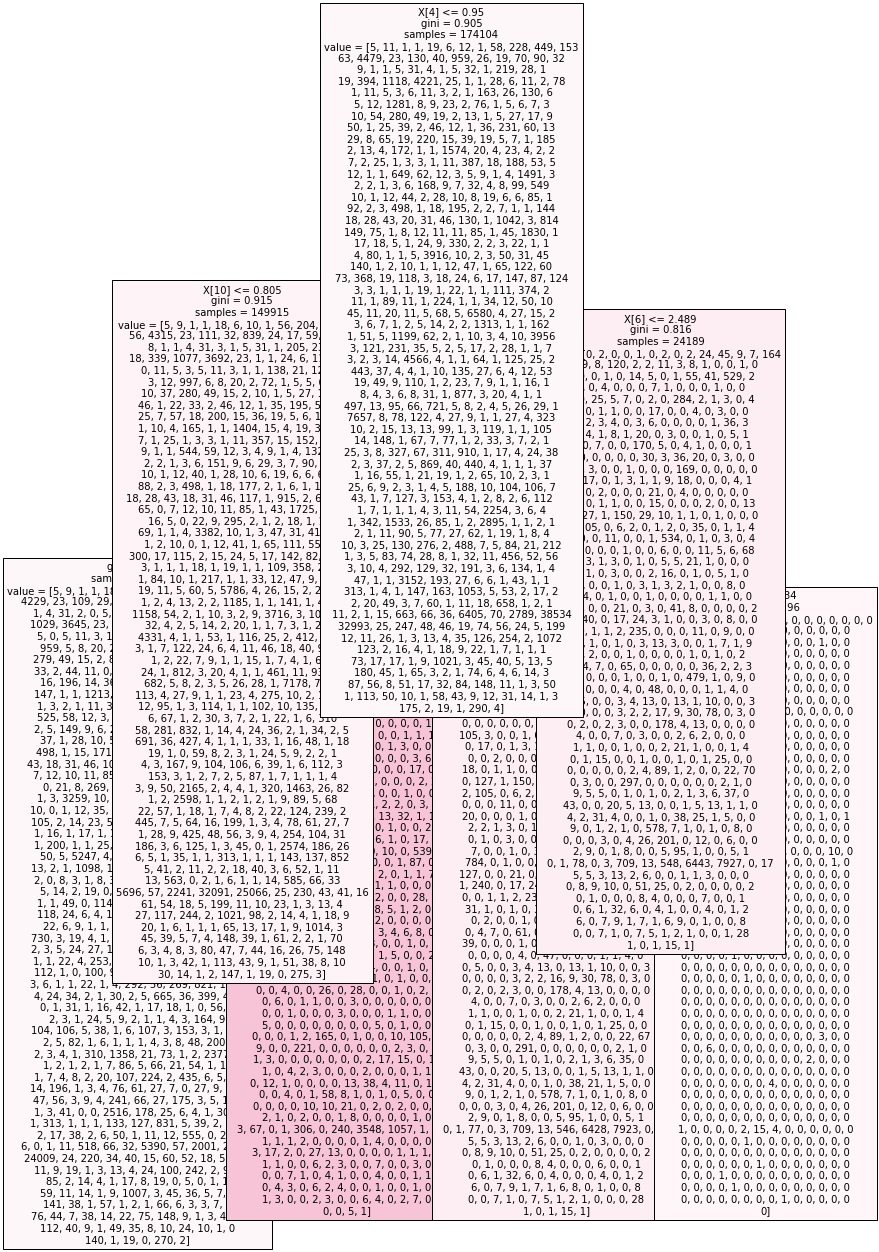

In [187]:
plt.figure(figsize=(15,15)); 
tree.plot_tree(clf,fontsize=10, filled=True);

In [188]:
y_pred = clf.predict(X_test)

In [189]:
y_pred

array(['UNKNOWN MEDIUM BIRD', 'UNKNOWN MEDIUM BIRD', 'UNKNOWN SMALL BIRD',
       ..., 'UNKNOWN MEDIUM BIRD', 'UNKNOWN MEDIUM BIRD',
       'UNKNOWN MEDIUM BIRD'], dtype=object)

In [197]:
clf.score(X_test, y_pred)

1.0

In [199]:
from sklearn import metrics
print("Accuracy:",metrics.balanced_accuracy_score(y_test, y_pred))

Accuracy: 0.0015029253471151513
